<a href="https://colab.research.google.com/github/ASMASHAIKH04/CREDIT-CARD-FRAUD-DETECTION/blob/main/ML_EXPT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sine Curve with Noise**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
angles = np.arange(60, 301, 1)
sine = np.sin(np.radians(angles))
noise = np.random.normal(0, 0.2, len(angles))
sine_curve = sine+noise
dataset = pd.DataFrame({'Angle': angles, 'Sine_Value': sine_curve})
dataset.to_csv('sine_curve_dataset.csv', index=False)

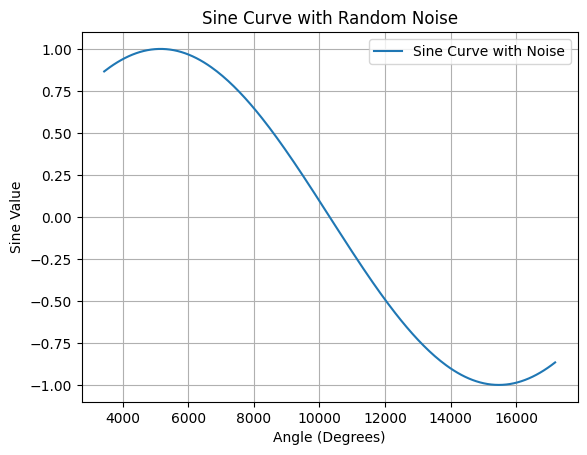

In [ ]:
plt.plot(np.rad2deg(angles), sine, label='Sine Curve with Noise')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Sine Value')
plt.title('Sine Curve with Random Noise')
plt.grid(True)
plt.legend()
plt.show()

**Linear Regression with Gradient Descent on Sine Data**

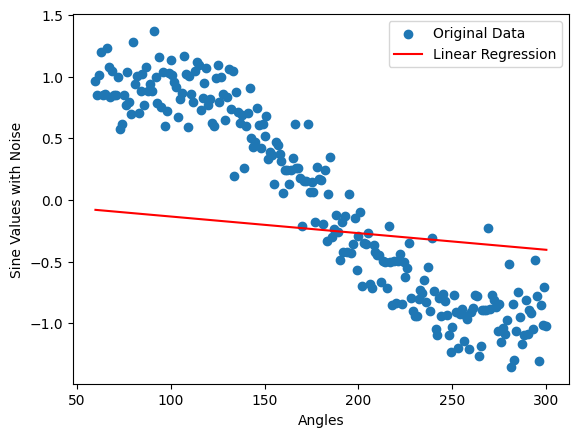

Final Parameters (theta): [ 1.82661636e-05 -1.35038377e-03]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression with Gradient Descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (1/m) * learning_rate * (X.T.dot(errors))

    return theta

# Generate sine curve with noise
np.random.seed(42)
angles = np.arange(60, 301, 1)
sine_curve = np.sin(np.radians(angles))
sine_noise = sine_curve + np.random.normal(0, 0.2, len(angles))

# Prepare data for linear regression
X = np.vstack((np.ones(len(angles)), angles)).T
y = sine_noise

# Initialize theta (parameters)
theta_initial = np.zeros(2)

# Set hyperparameters
learning_rate = 0.000000001
iterations = 100000

# Perform gradient descent
theta_final = gradient_descent(X, y, theta_initial, learning_rate, iterations)

# Plot the original data and the regression line
plt.scatter(angles, sine_noise, label='Original Data')
plt.plot(angles, X.dot(theta_final), color='red', label='Linear Regression')
plt.xlabel('Angles')
plt.ylabel('Sine Values with Noise')
plt.legend()
plt.show()

# Print the final parameters
print('Final Parameters (theta):', theta_final)


**Food Truck Dataset Linear Regression**

In [ ]:
data=pd.read_csv("/content/food_truck_data (1).txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot (theta)
  error = (y_pred - y) ** 2
  return 1/ (2*m) * np.sum(error)
m = data.Population.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))
cost_function(X, y, theta)

32.072733877455676

h(x) = 0.01 + 0.8x1


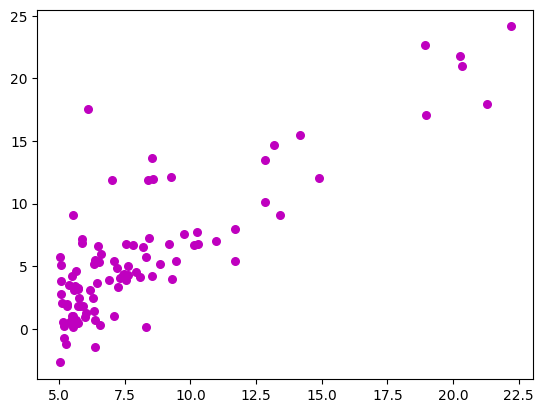

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred= X.dot (theta)
    error = np.dot(X.transpose(), (y_pred-y))
    theta-= alpha * 1/m *error
    costs.append(cost_function(X, y, theta))
  return theta, costs
theta, costs =gradient_descent(X, y, theta, alpha =0.01, iterations=10)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))
plt.scatter(data['Population'], data['Profit'], color = "m",marker = "o", s = 30)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Profit',axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,data['Profit'],test_size = 0.3,random_state = 42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.5905441260648103

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
predictions = reg.predict(X)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.064384699744403


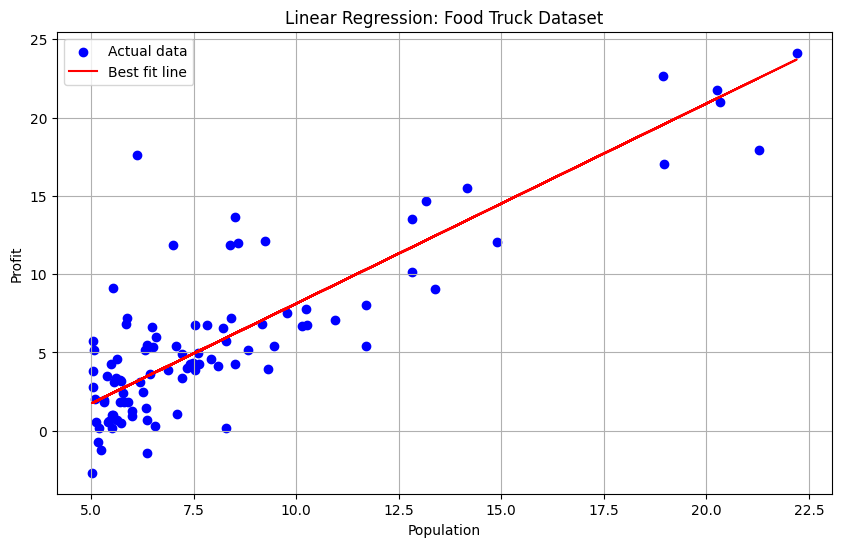

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, predictions, color='red', label='Best fit line')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression: Food Truck Dataset')
plt.legend()
plt.grid(True)
plt.show()

**Multiple Linear Regression on Home Data**

In [ ]:
df2 = pd.read_csv('/content/home_data (1).csv')
df2.head()
df2.columns
df2.nunique()

id               21436
date               372
price             4032
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
df2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
col_to_be_used = ['bedrooms','bathrooms','sqft_living']
df1 = df2[col_to_be_used]
df1.head()

,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1,df2['price'],test_size = 0.3,random_state = 42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)
reg.score(X_test,y_test)

0.4978201421834113

**Lasso and Ridge Regression**

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50,max_iter = 100,tol = 0.1)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)
train_predictions = lasso_reg.predict(X_train)
test_predictions = lasso_reg.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 63870504261.08206
Test Mean Squared Error: 72498357950.06429


In [ ]:
ridge_reg = linear_model.Ridge(alpha = 50,max_iter = 100,tol = 0.1)
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)
ridge_reg.score(X_train,y_train)
train_predictions = ridge_reg.predict(X_train)
test_predictions = ridge_reg.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 63870564735.277115
Test Mean Squared Error: 72499130721.37305
